In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
np.random.seed(42)

In [7]:
print("Loading Olivetti faces dataset...")
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)
X = olivetti.data
y = olivetti.target

Loading Olivetti faces dataset...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/gitongah/scikit_learn_data


In [8]:
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print(f"Dataset dimensions: {X.shape}")
print(f"Number of unique subjects (classes): {n_classes}")
print(f"Number of samples per subject: {np.bincount(y)[0]}")

Dataset dimensions: (400, 4096)
Number of unique subjects (classes): 40
Number of samples per subject: 10


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (280, 4096)
Testing set size: (120, 4096)


In [10]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# This helps to reduce the complexity of the model and improve training speed
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Applying PCA for dimensionality reduction...


In [12]:
print(f"Original feature dimensions: {X_train_scaled.shape[1]}")
print(f"Reduced feature dimensions with PCA: {X_train_pca.shape[1]}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")

Original feature dimensions: 4096
Reduced feature dimensions with PCA: 104
Explained variance ratio: 0.95


In [13]:
print("\nTraining MLP classifier...")
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100),  # Two hidden layers with 100 neurons each
    activation='relu',
    solver='adam',
    alpha=0.0001,  # L2 regularization parameter
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True,
    random_state=42
)


Training MLP classifier...


In [14]:
mlp.fit(X_train_pca, y_train)

Iteration 1, loss = 8.58022690
Validation score: 0.000000
Iteration 2, loss = 6.92886145
Validation score: 0.071429
Iteration 3, loss = 5.71058275
Validation score: 0.071429
Iteration 4, loss = 4.75125990
Validation score: 0.071429
Iteration 5, loss = 3.95685601
Validation score: 0.142857
Iteration 6, loss = 3.29630593
Validation score: 0.178571
Iteration 7, loss = 2.76821247
Validation score: 0.214286
Iteration 8, loss = 2.33232275
Validation score: 0.214286
Iteration 9, loss = 1.96788851
Validation score: 0.250000
Iteration 10, loss = 1.65898817
Validation score: 0.285714
Iteration 11, loss = 1.38739456
Validation score: 0.321429
Iteration 12, loss = 1.15887459
Validation score: 0.321429
Iteration 13, loss = 0.96440231
Validation score: 0.392857
Iteration 14, loss = 0.80997621
Validation score: 0.464286
Iteration 15, loss = 0.68329214
Validation score: 0.464286
Iteration 16, loss = 0.58196278
Validation score: 0.535714
Iteration 17, loss = 0.49770348
Validation score: 0.535714
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100),
              learning_rate='adaptive', max_iter=1000, random_state=42,
              verbose=True)

In [15]:
print("\nEvaluating model...")
y_pred = mlp.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Evaluating model...
Accuracy: 0.8000


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         3
           3       0.67      0.67      0.67         3
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       0.33      0.33      0.33         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
   

In [17]:
def visualize_predictions(X_test, y_test, y_pred, indices=None):
    if indices is None:
        # Select random samples if no indices are provided
        indices = np.random.choice(len(X_test), size=10, replace=False)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, idx in enumerate(indices):
        image = X_test[idx].reshape(64, 64)
        axes[i].imshow(image, cmap='gray')

        true_label = y_test[idx]
        pred_label = y_pred[idx]

        title = f"True: {true_label}\nPred: {pred_label}"
        color = "green" if true_label == pred_label else "red"
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


Found 24 misclassified samples
Visualizing some misclassified samples...


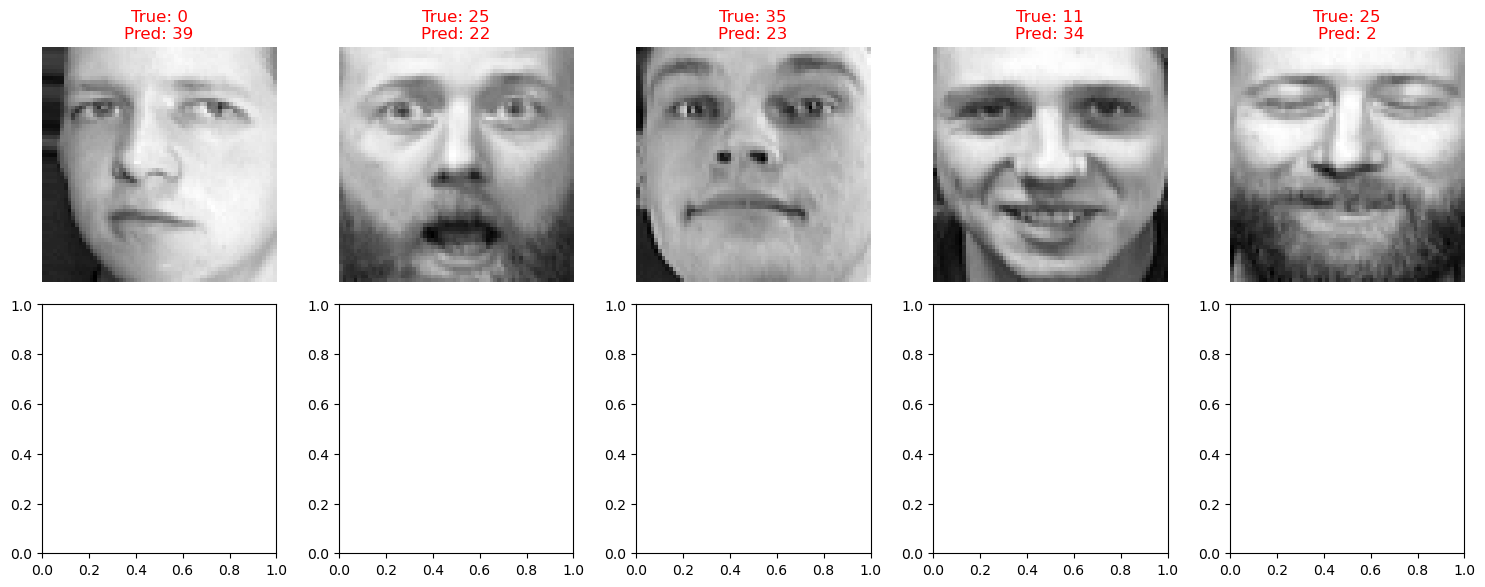


Visualizing some correctly classified samples...


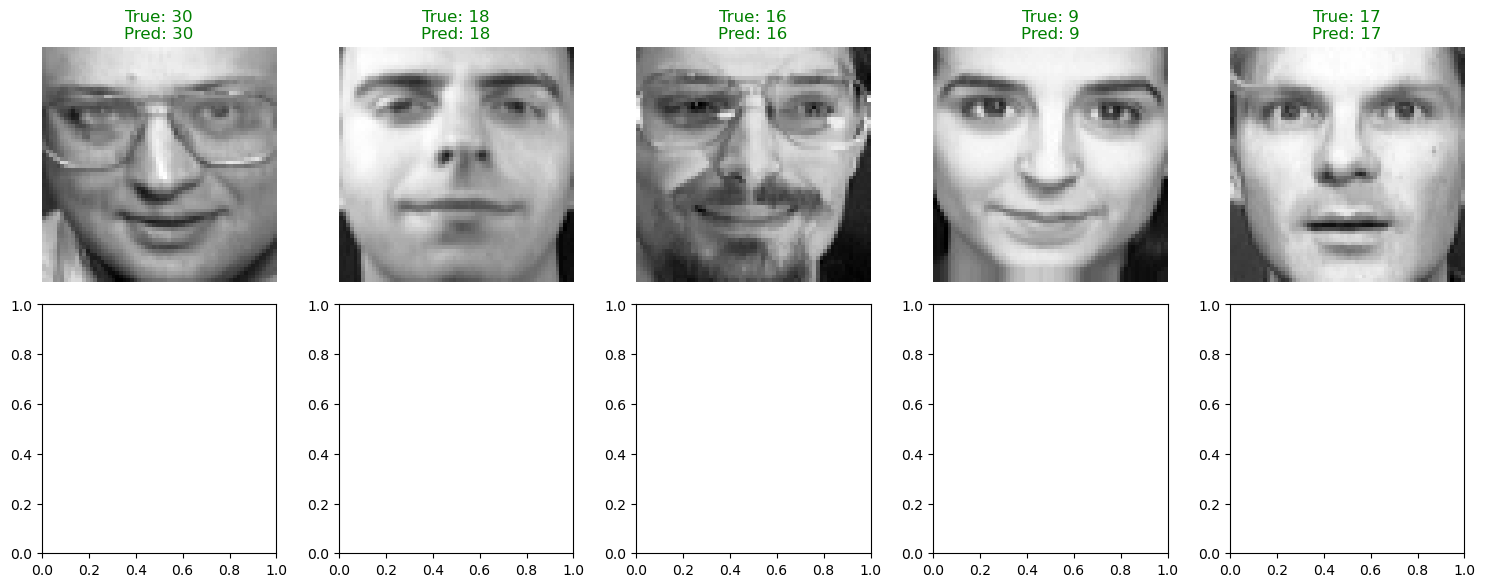

In [18]:
misclassified = np.where(y_test != y_pred)[0]
if len(misclassified) > 0:
    print(f"\nFound {len(misclassified)} misclassified samples")
    print("Visualizing some misclassified samples...")
    visualize_predictions(X_test, y_test, y_pred,
                         indices=misclassified[:min(5, len(misclassified))])

# Also visualize some correctly classified samples
correct = np.where(y_test == y_pred)[0]
if len(correct) > 0:
    print("\nVisualizing some correctly classified samples...")
    visualize_predictions(X_test, y_test, y_pred,
                         indices=correct[:5])

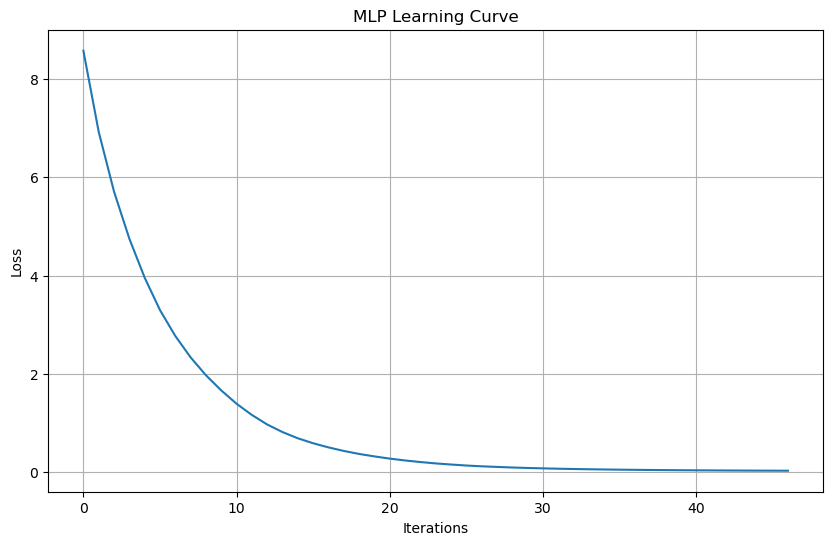

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

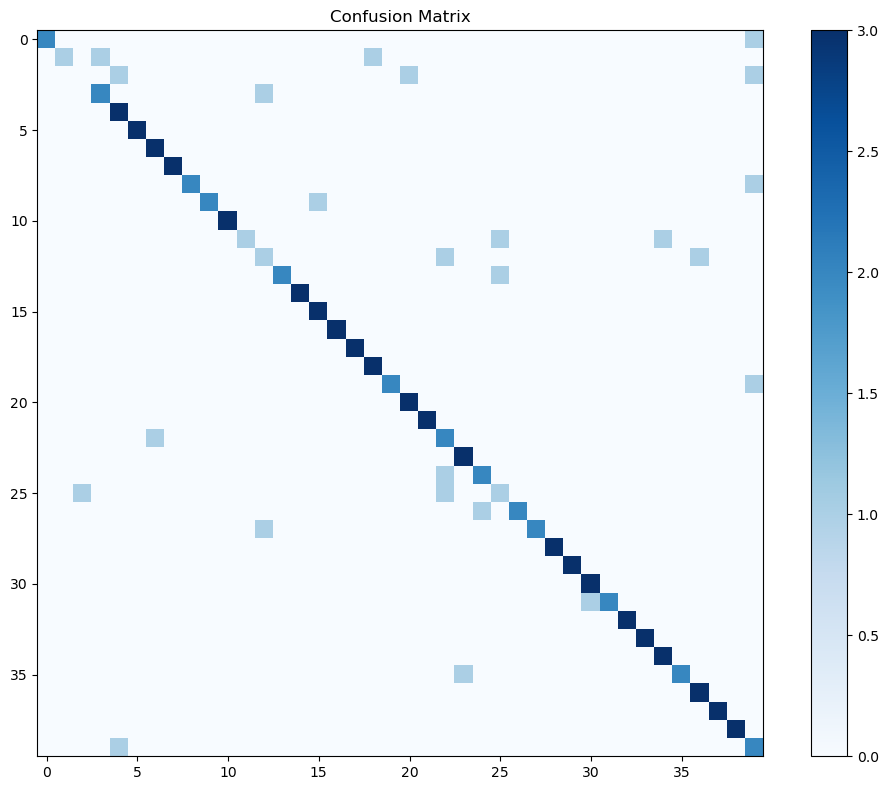

In [20]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.tight_layout()
plt.show()


Showing sample faces from the dataset:


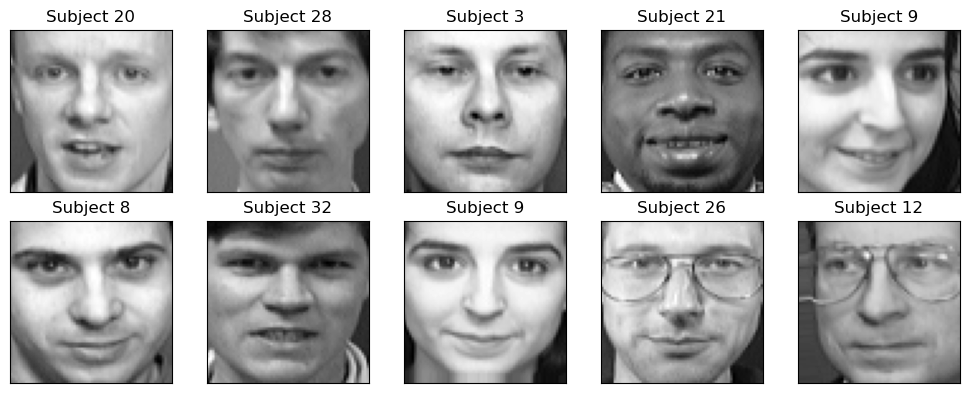

In [21]:
def show_faces(X, titles=None, n_row=2, n_col=5):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)
        if titles is not None:
            plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

print("\nShowing sample faces from the dataset:")
show_faces(X[:10], titles=[f"Subject {y[i]}" for i in range(10)])